<a href="https://colab.research.google.com/github/Sanjayzzz/Code_Zen/blob/main/Rice_Price_Prediction_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rice Price Prediction**

## **Load & Preprocess Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Once uploaded, the file will be in the current working directory
import pandas as pd

# Load the CSV file (use the correct filename after upload)df = df.fillna(df.mean())  # Replace missing values with column means

df = pd.read_csv('sample_rice_price_data_5years.csv')

# Display the first 5 rows
print(df.head())


Saving sample_rice_price_data_5years.csv to sample_rice_price_data_5years.csv
       date  rainfall  temperature  radiation  exchange_rate  yield  \
0  1/1/2020       152    30.765165  16.342749     209.172392   2584   
1  1/2/2020       229    27.740552  24.579341     203.002423   3958   
2  1/3/2020       142    30.541780  20.296597     188.272716   4735   
3  1/4/2020        64    31.514204  17.418933     200.178238   2395   
4  1/5/2020       156    33.297418  20.006036     192.487590   3631   

   rice_price  
0   92.249144  
1   85.070132  
2   80.471922  
3   87.971786  
4   86.435466  


In [ ]:
df


,date,rainfall,temperature,radiation,exchange_rate,yield,rice_price
0,1/1/2020,152,30.765165,16.342749,209.172392,2584,92.249144
1,1/2/2020,229,27.740552,24.579341,203.002423,3958,85.070132
2,1/3/2020,142,30.541780,20.296597,188.272716,4735,80.471922
3,1/4/2020,64,31.514204,17.418933,200.178238,2395,87.971786
4,1/5/2020,156,33.297418,20.006036,192.487590,3631,86.435466
...,...,...,...,...,...,...,...
1820,12/25/2024,119,25.622032,21.916557,217.627608,3284,82.491819
1821,12/26/2024,195,26.473030,24.656390,181.911255,2768,86.491141
1822,12/27/2024,177,25.078416,18.935553,194.089239,2982,84.948135
1823,12/28/2024,134,31.309218,16.307173,214.262879,3511,88.794698


***Handle Missing Values***

In [11]:
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)

## **`Feature Selection`**

In [12]:
X = df[['rainfall', 'temperature', 'radiation', 'exchange_rate', 'yield']]  # Example features
y = df['rice_price']  # Target variable


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Split Dataset for Training & Testing**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Linear Regression** 📌

In [15]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


# ***Random Forest Regression*** 📌

In [16]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


**Model Evaluation**

In [17]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred)}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred)}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_true, y_pred))}")
    print(f"R² Score: {r2_score(y_true, y_pred)}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")



Linear Regression Performance:
Mean Absolute Error (MAE): 1.5488483136696967
Mean Squared Error (MSE): 3.8073322122036006
Root Mean Squared Error (RMSE): 1.951238635381024
R² Score: 0.49952652087623883

Random Forest Regression Performance:
Mean Absolute Error (MAE): 1.6082129642295908
Mean Squared Error (MSE): 4.169589021036166
Root Mean Squared Error (RMSE): 2.041957154554465
R² Score: 0.4519078957214424


# **Visualize Predictions**

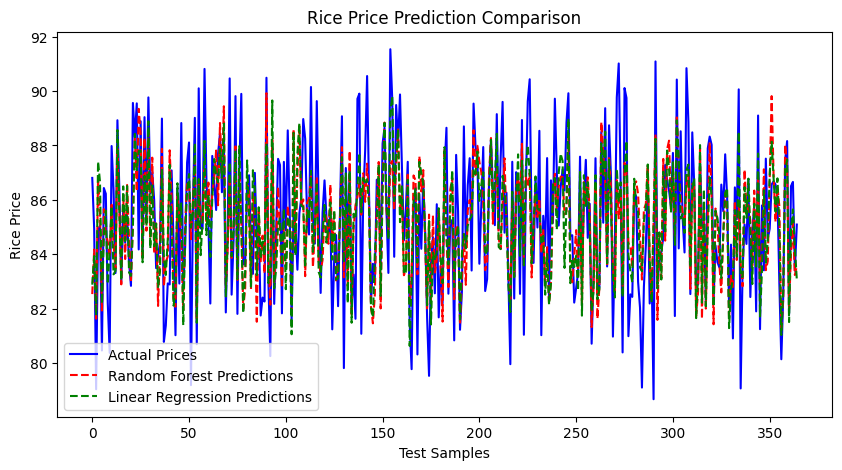

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Prices", color='blue')
plt.plot(y_pred_rf, label="Random Forest Predictions", color='red', linestyle="dashed")
plt.plot(y_pred_lr, label="Linear Regression Predictions", color='green', linestyle="dashed")
plt.legend()
plt.title("Rice Price Prediction Comparison")
plt.xlabel("Test Samples")
plt.ylabel("Rice Price")
plt.show()
